# 1. Modeling

## 1.1 Data preparation for modeling

**Train-test split**:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('ObesityDataset.csv')
y = data['NObeyesdad']
X = data.drop(columns=['NObeyesdad'])
X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

**Pre-Processing**

In [ ]:
# One-Hot Encoding


# cols_to_scale = ['Age', 'FCVC', 'NCP', 'CH20', 'FAF', 'TUE']
# scaler = StandardScaler()

# X_train_dummy[cols_to_scale] = scaler.fit_transform(X_train_dummy[cols_to_scale])
# X_test_dummy[cols_to_scale] = scaler.transform(X_train_dummy[cols_to_scale])

# pipeline = Pipeline([])

cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
num_cols = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

#preprocessing = transfomrer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop='first'), cat_cols)
    ], remainder='passthrough'
)


## 1.2 Build classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class="multinomial"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

#pipline train
pipelines = {}

for name, model in models.items():
    pipelines[name] = Pipeline([
        ("preprocess", preprocessor),
        ("clf", model)
    ])
    pipelines[name].fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 1.3 Model outputs for evaluation

In [ ]:
#output cho evaluation
y_pred = {}
y_proba = {}

for name, pipe in pipelines.items():
    y_pred[name] = pipe.predict(X_test)
    y_proba[name] = pipe.predict_proba(X_test)

# 2. EVALUATION

## 2.1. Performance Overview:

Logistic Regression Accuracy: 0.6146572104018913


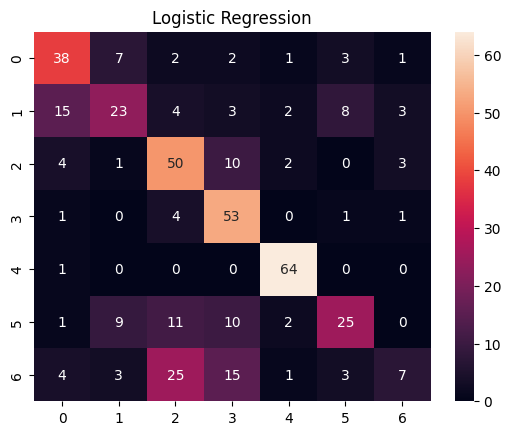

Decision Tree Accuracy: 0.7423167848699763


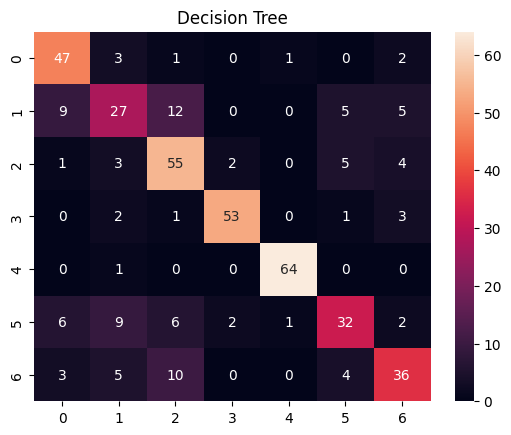

Random Forest Accuracy: 0.8557919621749409


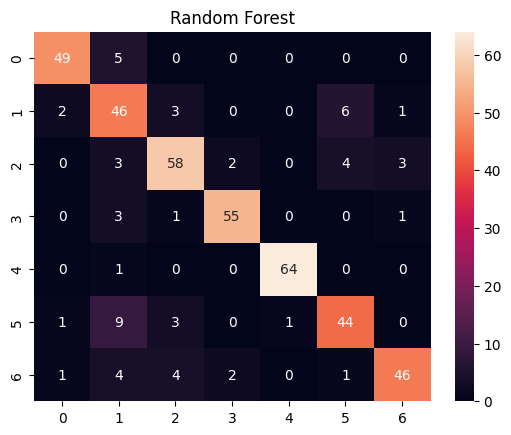

KNN Accuracy: 0.7257683215130024


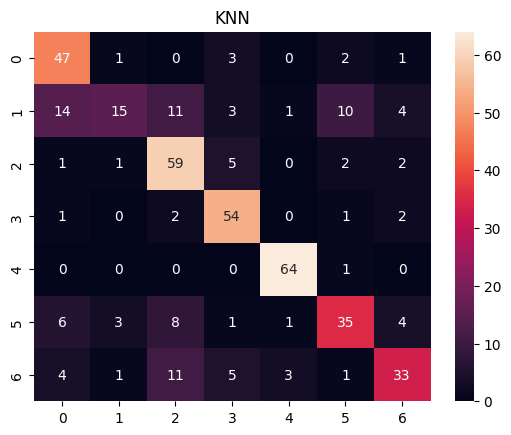

Gradient Boosting Accuracy: 0.7990543735224587


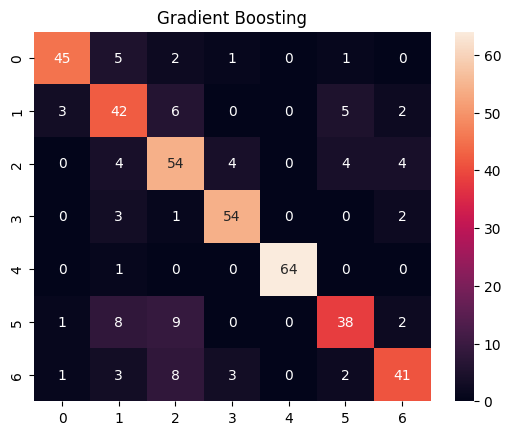

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name in pipelines:
    acc = accuracy_score(y_test, y_pred[name])
    print(f"{name} Accuracy:", acc)

    cm = confusion_matrix(y_test, y_pred[name])
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(name)
    plt.show()

## 2.2. Classification Report:

In [ ]:
from sklearn.metrics import classification_report

for name in pipelines:
    print(name)
    print(classification_report(y_test, y_pred[name], digits=4))

Logistic Regression
                     precision    recall  f1-score   support

Insufficient_Weight     0.5938    0.7037    0.6441        54
      Normal_Weight     0.5349    0.3966    0.4554        58
     Obesity_Type_I     0.5208    0.7143    0.6024        70
    Obesity_Type_II     0.5699    0.8833    0.6928        60
   Obesity_Type_III     0.8889    0.9846    0.9343        65
 Overweight_Level_I     0.6250    0.4310    0.5102        58
Overweight_Level_II     0.4667    0.1207    0.1918        58

           accuracy                         0.6147       423
          macro avg     0.6000    0.6049    0.5759       423
       weighted avg     0.6024    0.6147    0.5825       423

Decision Tree
                     precision    recall  f1-score   support

Insufficient_Weight     0.7121    0.8704    0.7833        54
      Normal_Weight     0.5400    0.4655    0.5000        58
     Obesity_Type_I     0.6471    0.7857    0.7097        70
    Obesity_Type_II     0.9298    0.8833    0.9

## 2.3. Model Discrimination Ability:

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)

for name in pipelines:
    auc = roc_auc_score(
        y_test_bin,
        y_proba[name],
        average="macro",
        multi_class="ovr"
    )
    print(f"{name} Macro ROC-AUC:", auc)

Logistic Regression Macro ROC-AUC: 0.5435342349064427
Decision Tree Macro ROC-AUC: 0.4620435960725993
Random Forest Macro ROC-AUC: 0.466727347533789
KNN Macro ROC-AUC: 0.4582378227669044
Gradient Boosting Macro ROC-AUC: 0.4738412741627471


**REASON WHY WE CHOOSE THIS MODEL**:

Because Random Forest has the highest accuracy: 0.8557919621749409

SAVE MODEL

In [ ]:
import pickle

model = pipelines['Random Forest'].fit(X_train, y_train)

# save Model
pickle.dump(model, open("model.pkl", "wb"))


In [ ]:
# load Model
model = pickle.load(open("model.pkl", "rb"))
